In [1]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MaxAbsScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_learning_curves
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

x_train_original = pd.read_csv("../data/COMP30027_2021_Project2_datasets/recipe_train.csv", index_col = False, delimiter = ',', header=0)
oversample = RandomOverSampler(sampling_strategy='minority')

train_label = x_train_original.loc[:,'duration_label']
X_train, X_test, y_train, y_test = train_test_split(x_train_original,train_label, test_size=0.2, stratify=train_label, random_state=42)



# First random oversampling, bring count of class 3 to be equal to the highest class count.
X_oversampled, y_oversampled = oversample.fit_resample(X_train, y_train)


# Second random oversampling, bring the count of class 2 to be equal to the other 2 classes
X_oversampled, y_oversampled = oversample.fit_resample(X_oversampled, y_oversampled)

# .value_counts()
# use recipe name as an example
train_corpus = X_oversampled.loc[:,['name','steps','ingredients']]
test_corpus = X_test.loc[:,['name','steps','ingredients']]
train_corpus

,name,steps,ingredients
0,couve brazilian style collard greens,"['wash the collard greens', 'remove the stems ...","['collard greens', 'butter']"
1,dijon mustard marinade for grilled fish,"['mix all ingredients well', 'to prepare your ...","['butter', 'dijon mustard', 'dry white wine', ..."
2,kathy 3 dry cooked green beans zwt ii asia,['cut green beans into 2 1 / 2 inch sections &...,"['fresh green beans', 'ground pork', 'dried sh..."
3,jumbo chicken salad stuff ems,"['preheat oven to 375f', 'mix chicken , cheese...","['cooked chicken', 'fat free cheese', 'green o..."
4,b b q d corn with chilli lime butter,['plunge the cobs of corn into water and then ...,"['corn', 'butter', 'lime', 'chili', 'garlic', ..."
...,...,...,...
48586,miso glazed salmon,"['preheat broiler', 'combine first 4 ingredien...","['brown sugar', 'low sodium soy sauce', 'hot w..."
48587,the deen brothers baked hush puppies,"['preheat oven to 450 degrees', 'lightly greas...","['vegetable oil', 'yellow cornmeal', 'all-purp..."
48588,quick creamy turkey vegetable soup,['in a 4-quart dutch oven or saucepan combine ...,"['reduced-sodium chicken broth', 'carrots', 'f..."
48589,betsy clear,"['pour ingredients over ice', 'stir', 'garnish...","['vodka', 'peach schnapps', 'sprite']"


In [3]:


# Joining columns for train
train_corpus['steps'] = train_corpus['steps'].apply(eval)
train_corpus['ingredients'] = train_corpus['ingredients'].apply(eval)
train_corpus['steps'] = train_corpus['steps'].apply(' '.join)
train_corpus['ingredients'] = train_corpus['ingredients'].apply(' '.join)


# Joining columns for test
test_corpus['steps'] = test_corpus['steps'].apply(eval)
test_corpus['ingredients'] = test_corpus['ingredients'].apply(eval)
test_corpus['steps'] = test_corpus['steps'].apply(' '.join)
test_corpus['ingredients'] = test_corpus['ingredients'].apply(' '.join)

# vectorizer = CountVectorizer()
# X = vectorizer.fit_transform(corpus)


SyntaxError: invalid syntax (<string>, line 1)

In [4]:
test_corpus

,name,steps,ingredients
3822,curried broccoli,"pour 2"" of water into a large pot place a coll...",broccoli fresh orange juice fresh lemon juice ...
29175,chicken with sourdough mushroom stuffing,lightly coat the inside of a 5-1 / 2- to 6-qua...,nonstick cooking spray lemon peel ground sage ...
14597,balalit saweeya or seviyan sweet vermicelli ...,place vermicelli on oven trays under broiler u...,rice vermicelli sugar ground cardamom rose wat...
16936,tempting turkey meatloaf,preheat oven to 375 degrees fahrenheit combine...,ground turkey onions fresh breadcrumb egg whit...
5540,mushroom barley pilaf,heat vegetable stock in a saucepan or the micr...,olive oil onion mushrooms basil barley vegetab...
...,...,...,...
8552,margaret s chicken roll ups,flatten chick to 1 / 3 inch thickness place on...,boneless skinless chicken breast halves mozzar...
23869,low fat chicken pot pie,preheat oven to 375 combine soup and next 3 in...,reduced-fat reduced-sodium condensed cream of ...
15949,apple cranberry crunch,arrange apples in a lightly greased 2-quart ba...,apples cinnamon whole berry cranberry sauce qu...
39215,mexican coleslaw,"wisk cilantro , vinegar , oil and salt in a la...",coleslaw mix fresh cilantro rice vinegar extra...


### Putting the features of all instances into a Bag of Words
Used to make CountVec and TF-IDF Sparse matrix

In [5]:

all_words = []

for i in range (0, len(train_corpus['steps'])):
    s = ''
    s += train_corpus.loc[i,'name'] + train_corpus.loc[i, 'steps'] + train_corpus.loc[i, 'ingredients']
    all_words.append(s)
    

In [6]:


test_corpus = test_corpus.reset_index()
all_words_test = []

for j in range (0, len(test_corpus['steps'])):
#     print(j)
    s = ''
    s += test_corpus.loc[j,'name'] + test_corpus.loc[j, 'steps'] + test_corpus.loc[j, 'ingredients']
    all_words_test.append(s)
    
all_words_test

['curried broccolipour 2" of water into a large pot place a collapsible steamer in the pot , cover , and bring water to a boil place the broccoli florets in steamer , cover and steam 5 minutes , or till tender-crisp meanwhile , in a large nonstick skillet , bring the orange and lemon juices to a boil over medium high heat reduce the juices down to 1 / 4 cup turn down heat to low and stir in butter and curry powder stir in the cooked broccoli florets and heat through move to a serving dish and season to taste with pepper to taste serve immediately and enjoy !broccoli fresh orange juice fresh lemon juice butter curry powder fresh ground black pepper',
 'chicken with sourdough mushroom stuffinglightly coat the inside of a 5-1 / 2- to 6-quart slow cooker with cooking spray reserve 1 teaspoon of the lemon peel in a small bowl combine remaining lemon peel , sage , seasoned salt and pepper remove 3 / 4 of the mixture and rub onto chicken legs place chicken in slow cooker melt butter in a skil

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
# stop_word ='english' means deleting some common words like the, a,.... in list 'english'



vectorizer = CountVectorizer(stop_words='english', max_features = 500)
X = vectorizer.fit(all_words)
vocab_dict = vectorizer.vocabulary_
# vocab = np.array(vectorizer.get_feature_names())

X_final = vectorizer.transform(all_words)
X_final.shape

(48591, 500)

In [28]:
vectorizer_t = CountVectorizer(stop_words='english', max_features = 500)
X_t = vectorizer_t.fit(all_words)
vocab_dict = vectorizer_t.vocabulary_
# vocab = np.array(vectorizer.get_feature_names())

X_t_final = vectorizer.transform(all_words_test)
X_t_final.shape

(8000, 500)

In [47]:
# from sklearn.model_selection import , X_test, y_train, y_test = train_test_split(X_final, y_oversampled, test_size=0.2, stratify=y_oversampled, random_state=42)


### Linear SVM

In [29]:
from sklearn import svm

LinearSVC_clf = svm.LinearSVC(dual=False, multi_class='ovr', random_state=0)

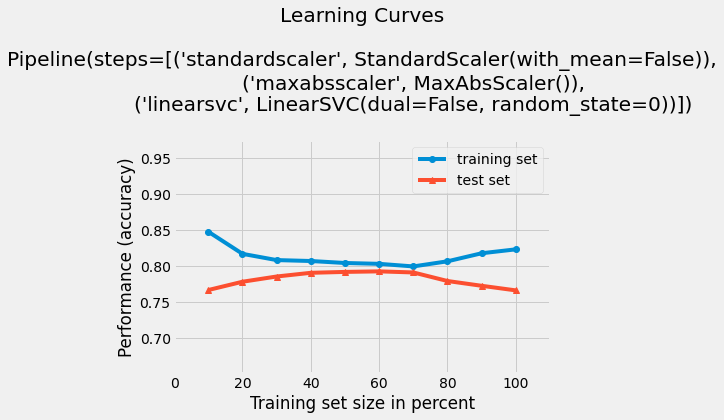

In [30]:
SVC_clf = make_pipeline(StandardScaler(with_mean=False), MaxAbsScaler(), LinearSVC_clf)
plot_learning_curves(X_final, y_oversampled, X_t_final, y_test, SVC_clf, scoring= 'accuracy')
plt.show()

In [31]:

SVC_clf.fit(X_final, y_oversampled)

y_test_predict = SVC_clf.predict(X_t_final)
y_train_predict = SVC_clf.predict(X_final)
print(accuracy_score(y_test, y_test_predict))
print(accuracy_score(y_oversampled, y_train_predict))
print(classification_report(y_test, y_test_predict))
cm = confusion_matrix(y_test, y_test_predict)
cm

0.766375
0.8232800312815131
              precision    recall  f1-score   support

         1.0       0.76      0.81      0.78      3541
         2.0       0.86      0.72      0.78      4049
         3.0       0.43      0.84      0.57       410

    accuracy                           0.77      8000
   macro avg       0.68      0.79      0.71      8000
weighted avg       0.79      0.77      0.77      8000



array([[2878,  461,  202],
       [ 885, 2910,  254],
       [  35,   32,  343]], dtype=int64)

### Implements TF-IDF as the feature engineering technique for our dataset.

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer(stop_words='english', max_features = 1000)
X = tf_idf.fit(all_words)
vocab_tfidf = X.vocabulary_
# vocab = np.array(vectorizer.get_feature_names())

X_tfidf = tf_idf.transform(all_words)
# y_oversampled.shape
X_tfidf.shape

(60738, 1000)

In [18]:

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_tfidf, y_oversampled, test_size=0.2, stratify=y_oversampled, random_state=42)
LinearSVC_clf_tfidf = svm.LinearSVC(dual=False, multi_class='ovr', random_state=0)

# Learning curve for LinearSVC

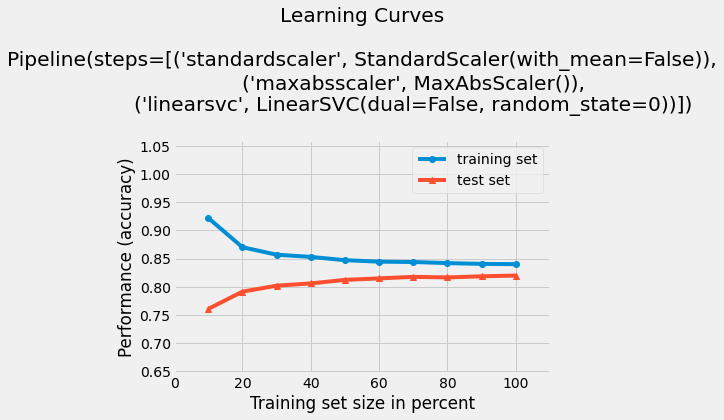

In [20]:
SVC_clf_tfidf = make_pipeline(StandardScaler(with_mean=False), MaxAbsScaler(), LinearSVC_clf_tfidf)
plot_learning_curves(X_train2, y_train2, X_test2, y_test2, SVC_clf_tfidf, scoring= 'accuracy')
plt.show()

In [22]:
SVC_clf_tfidf.fit(X_train2, y_train2)

y_test_predict2 = SVC_clf_tfidf.predict(X_test2)
y_train_predict2 = SVC_clf_tfidf.predict(X_train2)
print(accuracy_score(y_test2, y_test_predict2))
print(accuracy_score(y_train2, y_train_predict2))
print(classification_report(y_test2, y_test_predict2))
cm = confusion_matrix(y_test2, y_test_predict2)
cm

0.8200526835693118
0.8402346161761679
              precision    recall  f1-score   support

         1.0       0.76      0.80      0.78      4049
         2.0       0.80      0.73      0.77      4049
         3.0       0.89      0.93      0.91      4050

    accuracy                           0.82     12148
   macro avg       0.82      0.82      0.82     12148
weighted avg       0.82      0.82      0.82     12148



array([[3239,  605,  205],
       [ 836, 2972,  241],
       [ 161,  138, 3751]], dtype=int64)

### Learning curve for Gaussian Naive Bayes Classifier
GNB was not implemented itself as we deemed it unfit for this classification task, 2 main reasons.
1) Features cannot be assumed to be indepedent from one another, for example ingredients can appear in the name, and or steps   
2) Blah blah blah

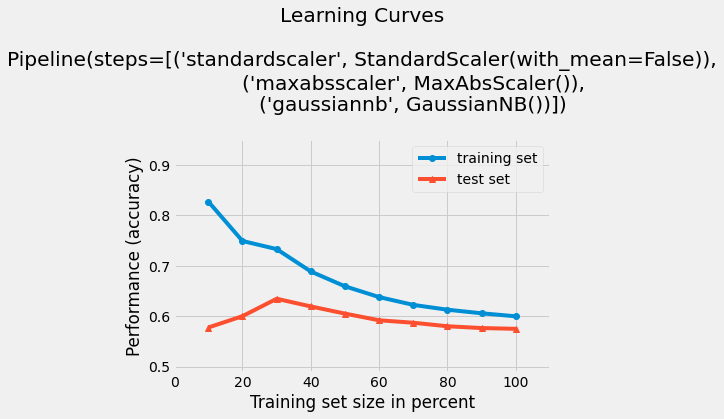

In [74]:
from sklearn.naive_bayes import GaussianNB


GNB = GaussianNB()
GNB_clf = make_pipeline(StandardScaler(with_mean=False), MaxAbsScaler(), GNB)
plot_learning_curves(X_train2.toarray(), y_train2, X_test2.toarray(), y_test2, GNB_clf, scoring= 'accuracy')
plt.show()


### Learning curve for SGD Classifier

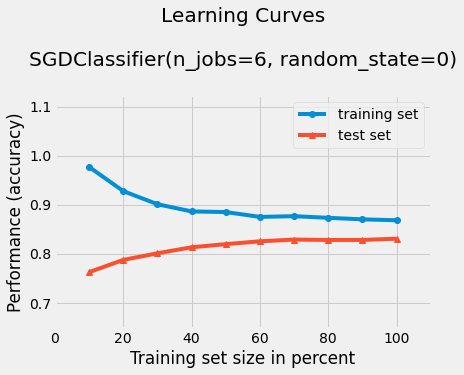

In [25]:
from sklearn.linear_model import SGDClassifier

clf_SGD = SGDClassifier(max_iter=1000, tol=1e-3, n_jobs=6, random_state=0)
plot_learning_curves(X_train, y_train, X_test, y_test, clf_SGD, scoring= 'accuracy')
plt.show()

In [26]:
SGD = make_pipeline(StandardScaler(with_mean=False), MaxAbsScaler(),clf_SGD)
SGD.fit(X_train, y_train)

y_test_predict_SGD = SGD.predict(X_test)
y_train_predict_SGD = SGD.predict(X_train)
print(accuracy_score(y_test, y_test_predict_SGD))
print(accuracy_score(y_train, y_train_predict_SGD))
print(classification_report(y_test, y_test_predict_SGD))
cm = confusion_matrix(y_test, y_test_predict_SGD)
cm
X_train.shape

0.8267204478103392
0.8528298003704466
              precision    recall  f1-score   support

         1.0       0.77      0.81      0.79      4049
         2.0       0.82      0.72      0.77      4049
         3.0       0.89      0.95      0.92      4050

    accuracy                           0.83     12148
   macro avg       0.83      0.83      0.82     12148
weighted avg       0.83      0.83      0.82     12148



(48590, 2000)

In [27]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression


estimators = [
     ('CountVecSVC', make_pipeline(StandardScaler(with_mean=False), MaxAbsScaler(), LinearSVC_clf)),
     ('SGD', make_pipeline(StandardScaler(with_mean=False), MaxAbsScaler(),clf_SGD))]

stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(n_jobs=6, random_state=0), n_jobs=6)

stacking_clf.fit(X_train, y_train)


y_test_predict_stack = stacking_clf.predict(X_test)
y_train_predict_stack = stacking_clf.predict(X_train)
print(accuracy_score(y_test, y_test_predict_stack))
print(accuracy_score(y_train, y_train_predict_stack))
print(classification_report(y_test, y_test_predict_stack))
cm = confusion_matrix(y_test, y_test_predict_stack)
cm


0.8416200197563385
0.8682856554846676
              precision    recall  f1-score   support

         1.0       0.76      0.84      0.80      4049
         2.0       0.84      0.73      0.78      4049
         3.0       0.93      0.96      0.94      4050

    accuracy                           0.84     12148
   macro avg       0.84      0.84      0.84     12148
weighted avg       0.84      0.84      0.84     12148



array([[3391,  522,  136],
       [ 924, 2958,  167],
       [ 119,   56, 3875]], dtype=int64)

### Running model on REAL Test data

In [78]:
import scipy
final_test = scipy.sparse.load_npz('CountVec.npz')

# stacking_clf.fit(X_train, y_train)
real_test_pred = stacking_clf.predict(final_test)
real_test_pred
# final_test.shape



array([3., 2., 1., ..., 1., 1., 3.])

In [79]:
a = [x for x in range(1,10001)]

result = {
    'id': a,
    'duration_label': real_test_pred
}
result = pd.DataFrame(result)
result.to_csv('result.csv', index = False)